# EDA - Credit Card Data Analysis

## 1. INTRODUCTION

The following notebook describes the step taken to perform an end-to-end Exploratory Data Analysis (EDA). Through the application of EDA it is intended to understand the behavior of **interested** and **not interested** customers for the credit card. 

**Objectives**

   - Describe the customer profile;
   - Check the bivariate association between the variable of interest and the other variables;
   - Identify possible factors associated with interested customers.

This notebook contains all the modules we have learned while performing EDA, namely:
1. **Variable Identification and Typecasting**;
2. **Univariate analysis**:
    - Graphical visualization of all types of variables.
    - Identification and treatment of missing value;
    - Identification and treatment of outliers;
        
    
3. **Bivariate analysis**:
    - Correlation;
    - Hypothesis testing (Chi-square and Z-test/T-test);
    
    
4. **Multivariate analysis**.

We will try to validate some hypotheses during the research in the modules above.


This project uses libraries such as **pandas**, **numpy**, **matplotlib**, **seaborn** and **scipy.stats**.

## 2. DATA ANALYSIS

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from numpy import sqrt, abs, round
from scipy.stats import t as t_dist
from numpy import sqrt, abs, round
from scipy.stats import norm
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
# Importing data
data = pd.read_csv("C:\\Users\\Rohan\\Desktop\\AV Assignments\\EDA\\eda project 1\\Data.csv")

In [3]:
#first 5 instances of the data
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
#last 5 instances of the data
data.tail()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0
245724,BOCZSWLJ,Male,29,RG269,Salaried,X1,21,No,1129276,No,0


In [5]:
print('There are', '\033[1m', data.shape[0], '\033[0m', 'observations in the dataset and',
      '\033[1m', data.shape[1], '\033[0m','variables, where one refers to the Customer ID and 13 independent \nvariables and 1 target variable (Is Lead)')

There are  245725  observations in the dataset and  11  variables, where one refers to the Customer ID and 13 independent 
variables and 1 target variable (Is Lead)


In [6]:
data.isna().sum()/data.shape[0]*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

There are missing values in the data. For Credit_Product, around 12% of the data is composed by missing values.

##### MISSING VALUE TREATMENT


Considering that the variables which have missing values are categorical, we will change the missing values by the mode of each variable.

In [7]:
data['Credit_Product'].fillna(data['Credit_Product'].mode()[0],inplace = True)

In [8]:
data.isna().sum()/data.shape[0]*100

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
Is_Lead                0.0
dtype: float64

Now, there are no missing values in data.

### 2.1. TYPECASTING

In [9]:
print('This data is composed of: \n', '\033[1m -', (data.dtypes == 'int64').sum(), '\033[0m', 
      'Integer variables \n', '\033[1m -', (data.dtypes == 'float64').sum(), '\033[0m',
     'Float variables \n', '\033[1m -', (data.dtypes == 'object').sum(), '\033[0m', 'Object vaiables')

This data is composed of: 
  - 4  Integer variables 
  - 0  Float variables 
  - 7  Object vaiables


In [10]:
# Finding out the integers variables
data.dtypes[data.dtypes == 'int64']

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
Is_Lead                int64
dtype: object

In [11]:
# Finding out the object variables
data.dtypes[data.dtypes == 'object']

ID                object
Gender            object
Region_Code       object
Occupation        object
Channel_Code      object
Credit_Product    object
Is_Active         object
dtype: object

In [12]:
#Typecasting the object variables to categoriy
data['Gender'] = data['Gender'].astype('category')
data['Region_Code'] = data['Region_Code'].astype('category')
data['Occupation'] = data['Occupation'].astype('category')
data['Channel_Code'] = data['Channel_Code'].astype('category')
data['Credit_Product'] = data['Credit_Product'].astype('category')
data['Is_Active'] = data['Is_Active'].astype('category')

In [13]:
data.dtypes

ID                       object
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
Is_Lead                   int64
dtype: object

### 2.2. UNIVARIATE ANALYSIS

In this section, we will do a univariate analysis as it is the simplest way to analyze data where we examine each variable individually. For *__numerical variables (2.2.1)__*, probability density plot and box plot will be used to look at the distribution of the variables and to identify outliers. For *__categorical variables (2.2.2)__* we will use bar plot which will calculate the number of each category in a particular variable.

#### 2.2.1. NUMERICAL VARIABLES

In [14]:
numerical = data.select_dtypes(include = ['int64'])
numerical.dtypes

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
Is_Lead                int64
dtype: object

In [15]:
for i in numerical.columns:
    print(f'range of {i}:[{data[i].min()}, {data[i].max()}]')

range of Age:[23, 85]
range of Vintage:[7, 135]
range of Avg_Account_Balance:[20790, 10352009]
range of Is_Lead:[0, 1]


In [16]:
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)))

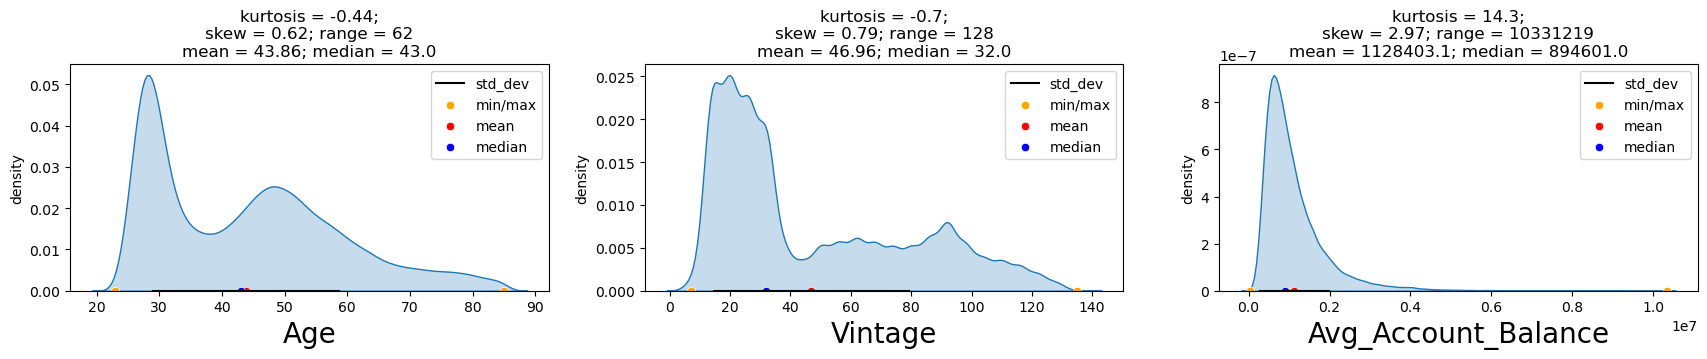

In [17]:
UVA_KDE(data,['Age', 'Vintage','Avg_Account_Balance' ])

In [18]:
def UVA_boxplot(data, var_group, include_outlier = True):
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  from scipy import stats
  for j,i in enumerate(var_group):
   
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    skew = data[i].skew()
    mini = data[i].min()
    maxi = data[i].max()
    kurt = data[i].kurtosis()
    shapiro_test = stats.shapiro(data[i])
    
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])
    
    plt.subplot(1,size,j+1)
    sns.boxplot(data[i], orient="v")
    plt.ylabel('{}'.format(i))
    plt.title('Skew = {}; Range = {} \n 1st, 2nd, 3rd  quartile = {};\n Whiskers = {}; kurtosis = {} ; \n Number of Outlier (low/high) = {} '.format(
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2)),
                                                                                                   (round(quant25,2),round(med,2),round(quant75,2)),
                                                                                                   (round(whis_low,2), round(whis_high,2)), 
                                                                                                   (round(kurt,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

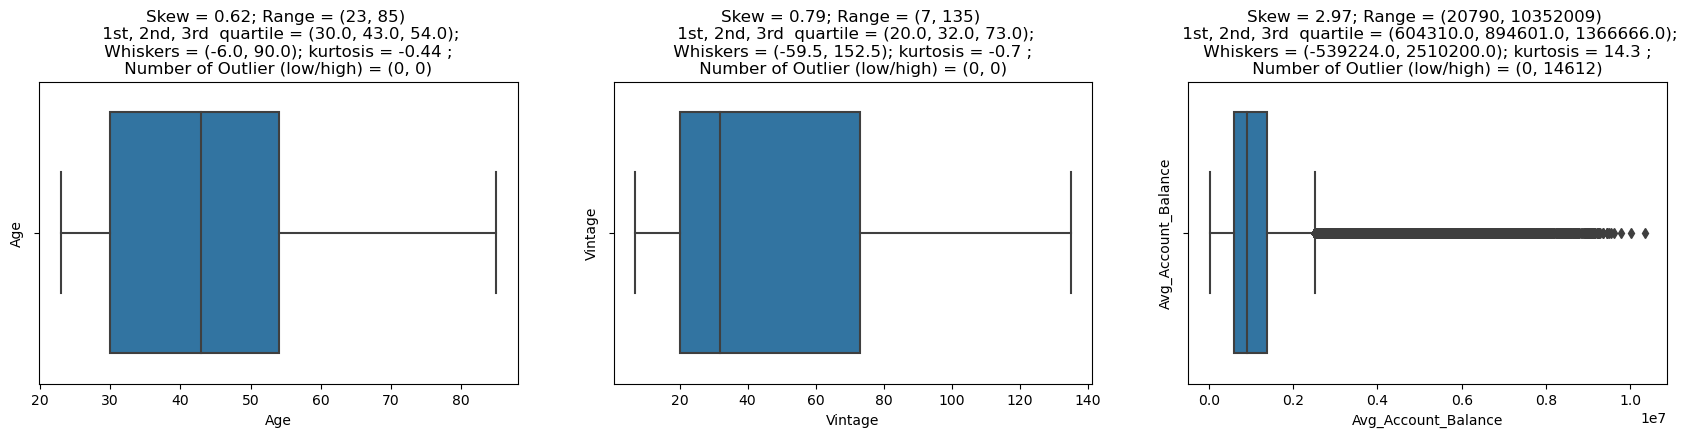

In [19]:
UVA_boxplot(data,['Age', 'Vintage','Avg_Account_Balance' ])

#### 2.2.1. CATEGORICAL VARIABLES

In [20]:
data.select_dtypes(include = [ 'category']).dtypes

Gender            category
Region_Code       category
Occupation        category
Channel_Code      category
Credit_Product    category
Is_Active         category
dtype: object

In [21]:
def UVA_category(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (8*size,6), dpi = 100)
    
  for j,i in enumerate(var_group):
    norm_count = round(data[i].value_counts(normalize = True)*100,2)
    n_uni = data[i].nunique()
    sns.set_style('darkgrid')
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
    plt.tight_layout()

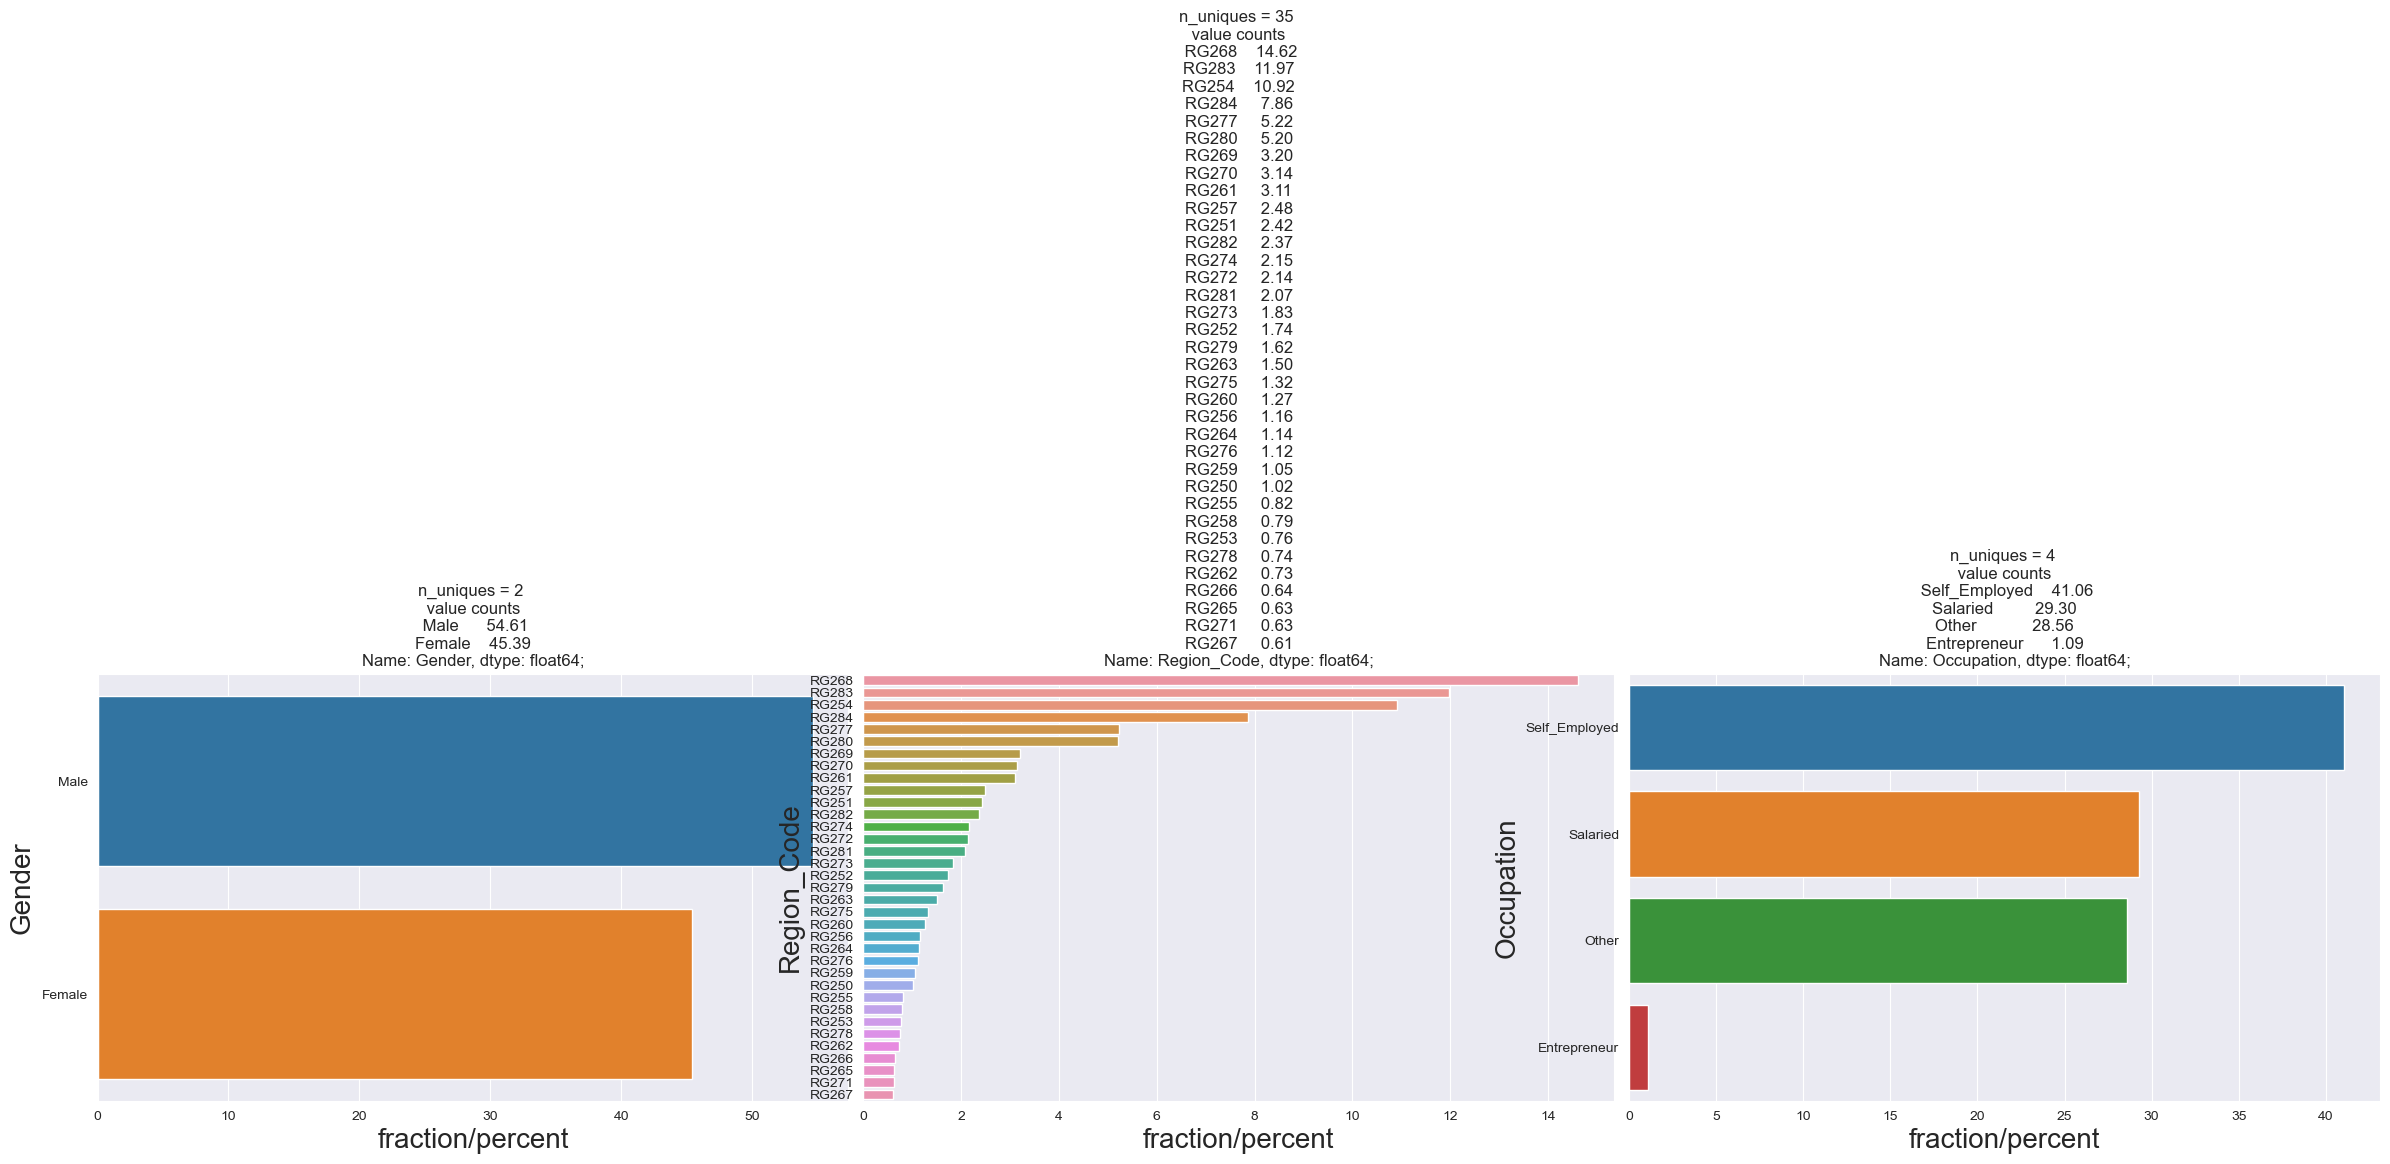

In [22]:
UVA_category(data, ['Gender','Region_Code','Occupation', ])

RESULTS:

It can be inferred from the above bar plot that:
1. Around 45% of the customers are female;
2. There are 35 different regions of the bank and RG268 has the highest weightage i.e. around 15%;
3. Around 41% of the customers are self employed

In [23]:
data['Target_variable'] = 0
data['Target_variable'][(data['Is_Lead']== 1)] = 'Interested'
data['Target_variable'][(data['Is_Lead']!= 1)] = 'Not Interested'

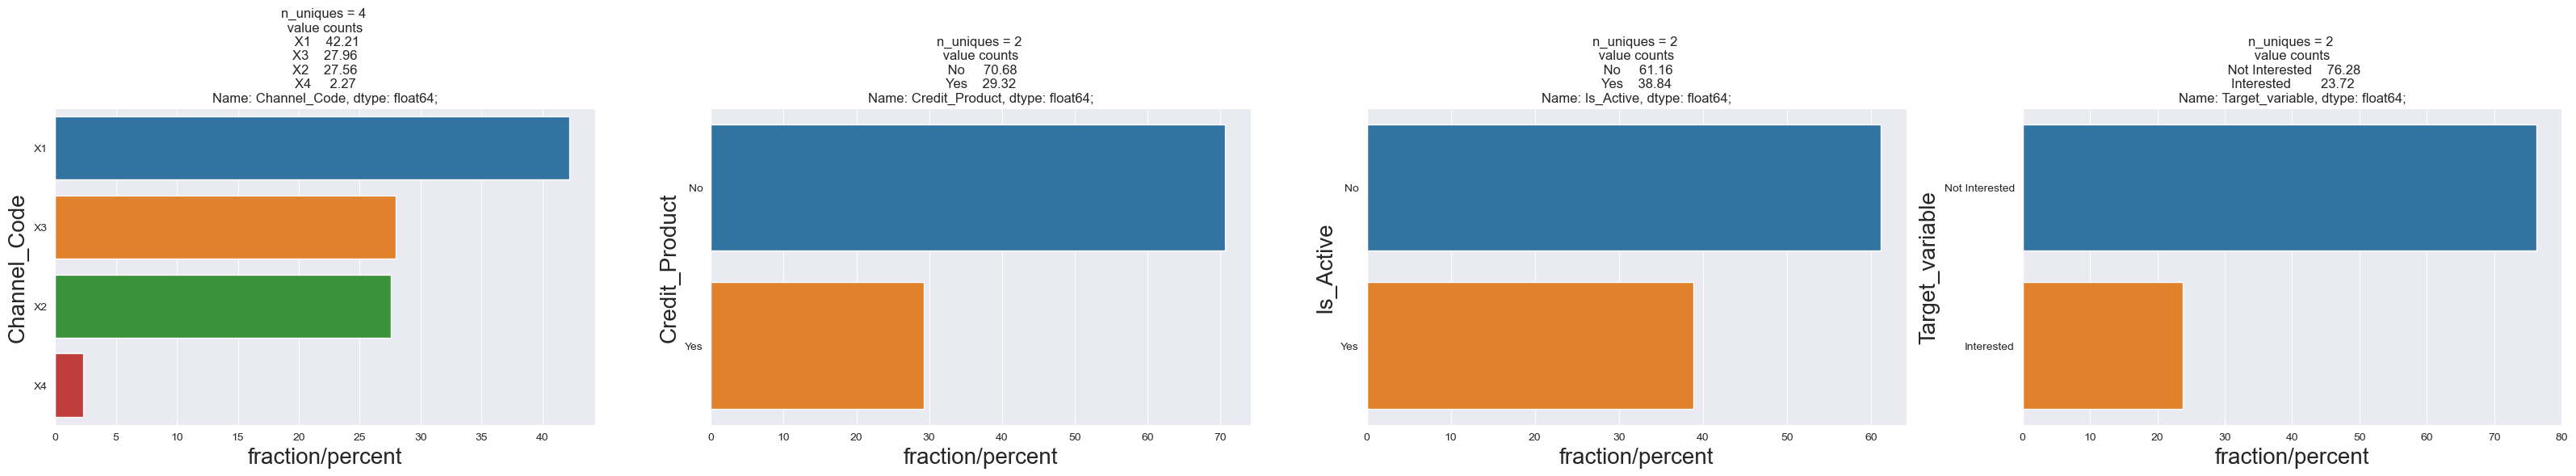

In [24]:
UVA_category(data, ['Channel_Code','Credit_Product','Is_Active','Target_variable' ])

RESULTS:

It can be inferred from the above bar plot that:
1. Around 42% of the channel code are from X1;
2. around 71% of the customers are not involved in  any active credit product;
3. only 39% of the customers were active in last 3 months;
4. only 24% of the customers are actually interested for the credit card

###### In order to have a better view of our data, we will categorize some numerical variables so that we can have a view similar to the one we made above.

In [25]:
data['Age_range'] = 'str'
data['Age_range'][(data['Age']<= 40)] = 'Young adults'
data['Age_range'][(data['Age']>40)] = 'Old-aged adults'
data['Age_range'] = data['Age_range'].astype('category')

data['Vintage_range'] = 'str'
data['Vintage_range'][(data['Vintage']<= 48)] = '0-4 years'
data['Vintage_range'][(data['Vintage']>48) & (data['Vintage']<=96)] = '4-8 years'
data['Vintage_range'][(data['Vintage']>96)] = '>8 years'
data['Vintage_range'] = data['Vintage_range'].astype('category')

data['Avg_Balance_Range'] = 'str'
data['Avg_Balance_Range'][(data['Avg_Account_Balance']<= 700000)] = 'Low'
data['Avg_Balance_Range'][(data['Avg_Account_Balance']> 700000) & (data['Avg_Account_Balance']<= 1500000)] = 'Medium'
data['Avg_Balance_Range'][(data['Avg_Account_Balance']> 1500000) & (data['Avg_Account_Balance']<= 2500000)] = 'High'
data['Avg_Balance_Range'][data['Avg_Account_Balance']> 2500000] = 'Very High' 
data['Avg_Balance_Range'] = data['Avg_Balance_Range'].astype('category')

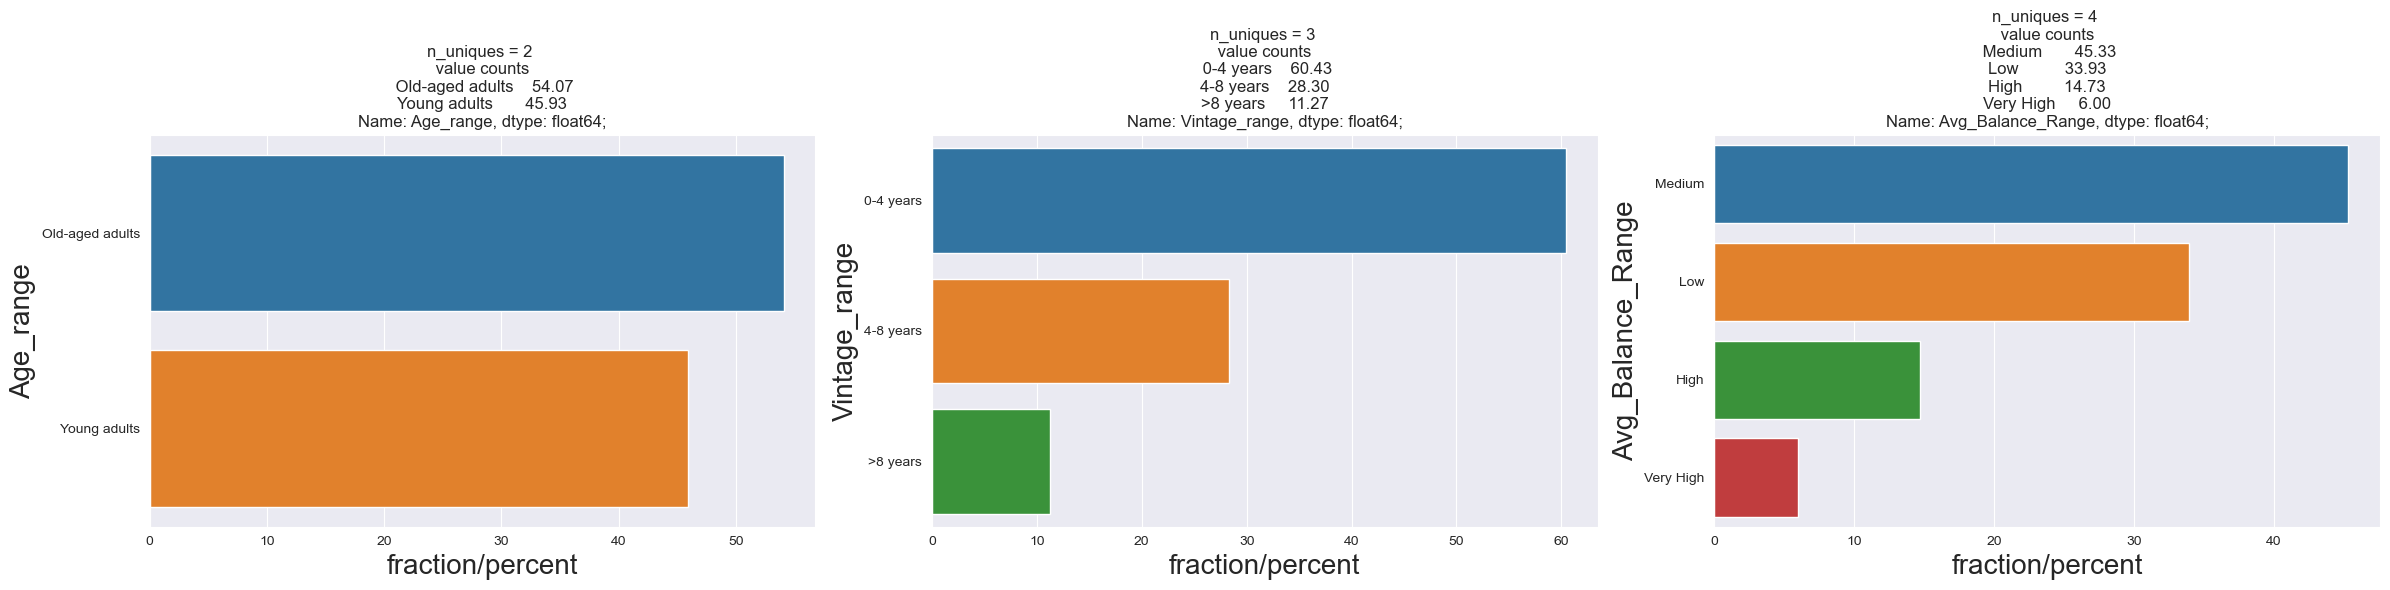

In [26]:
UVA_category(data, ['Age_range','Vintage_range', 'Avg_Balance_Range' ])  

**RESULTS:**

It can be inferred from the above `bar plot`  that:
* Around 54% are _old-aged adults (>40 years old)_ and 46% are _young adults (<40 years old)_ ;
* Around 60% of the customers vintage lies within 4 years and rest 40% have more than 4 years of vinatge.
* around 34% of the customers have low average account balance(<700000) and 6% of the customers average comes under outliers.

### 2.3. BIVARIATE ANALYSIS

#### 2.3.1. NUMERICAL - NUMERICAL

In [27]:
numerical = data.select_dtypes(exclude = ['category','object'])[:]
numerical.dtypes

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
Is_Lead                int64
dtype: object

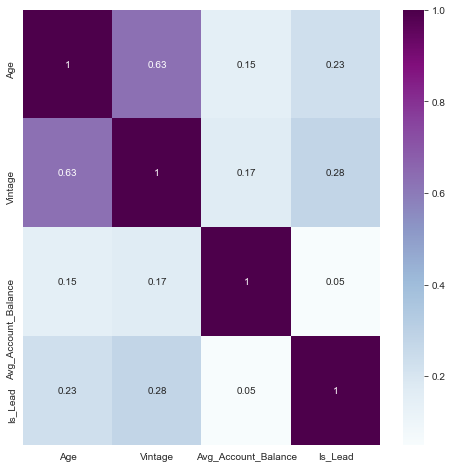

In [28]:
rounded = round(data.corr(method = 'pearson'),2)
plt.figure(figsize=(8,8))
ax = sns.heatmap(rounded, cmap='BuPu', annot=True)
plt.show()

**RESULTS:**

From this graph, we can clearly see that there are a strong correlation between the variables **Age** and **Vintage**. 

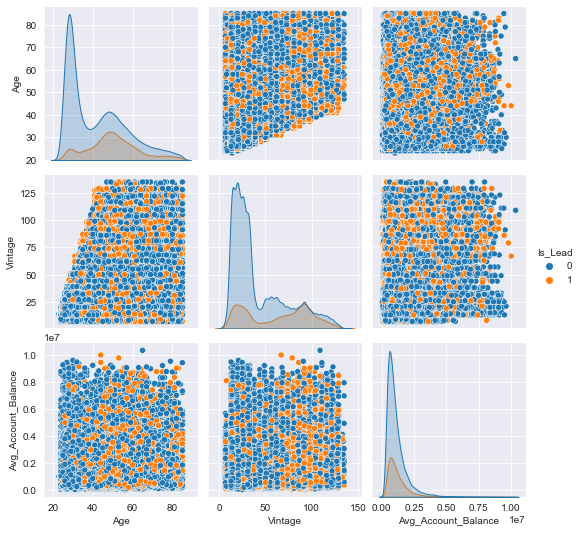

In [29]:
sns.pairplot(data=data,hue='Is_Lead',diag_kind='kde')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Vintage'>

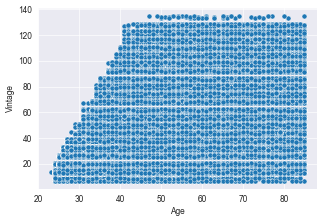

In [30]:
plt.figure(dpi=60)
sns.scatterplot(numerical['Age'], numerical['Vintage'])

**RESULT:** we can observe that till the age of 40, the vintage increases along with their age. After reaching 40, it doesn't increase.

<AxesSubplot:xlabel='Age', ylabel='Avg_Account_Balance'>

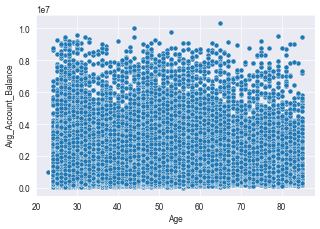

In [31]:
plt.figure(dpi=60)
sns.scatterplot(numerical['Age'], numerical['Avg_Account_Balance'])

**RESULT:** we can obsereve that the average account balance is approximately the same in every age group.

<AxesSubplot:xlabel='Vintage', ylabel='Avg_Account_Balance'>

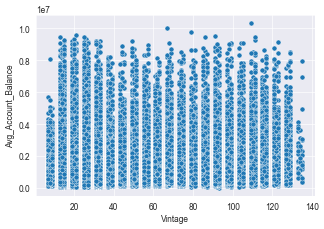

In [32]:
plt.figure(dpi=60)
sns.scatterplot(numerical['Vintage'], numerical['Avg_Account_Balance'])

**RESULT:** here we can observe a similar trend that is the average account balance is almost similar in every vintage in months. so, we can say that vintage does not really affect the average account balance of the customer.

#### 2.3.2. CATEGORICAL - CATEGORICAL

In [33]:
def BVA_categorical_plot(data, tar, cat):

  data = data[[cat,tar]][:]

  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  chi, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False

  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))
  
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  
  int_level = data[cat].value_counts()  

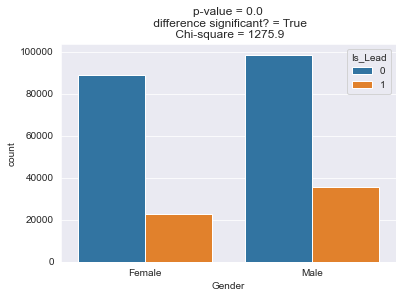

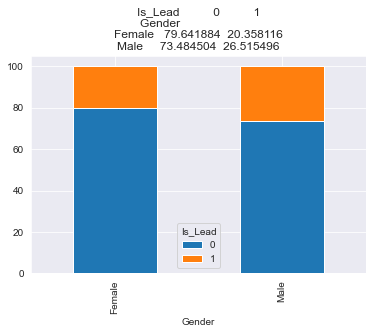

In [34]:
BVA_categorical_plot(data, 'Is_Lead', 'Gender')

**RESULTS:**

- By the p_value of Chi square test, we can assume that the difference between the males and females interested customer is significant (They are independent)/ the gender has a significant impact on the Is Lead.
- By the frequecies, we can assume that males are more likely to be interested for the credit card.

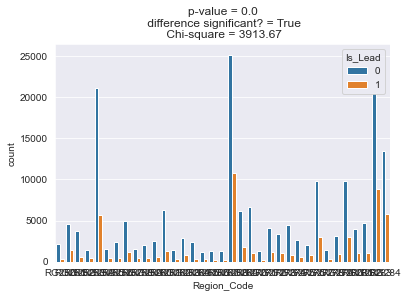

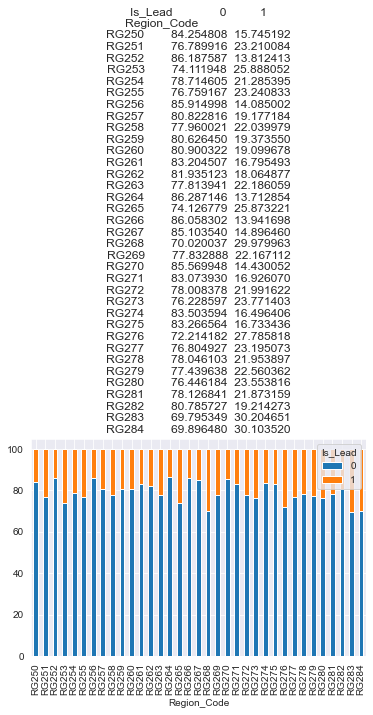

In [35]:
BVA_categorical_plot(data, 'Is_Lead', 'Region_Code')

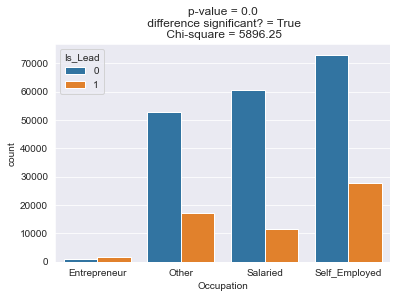

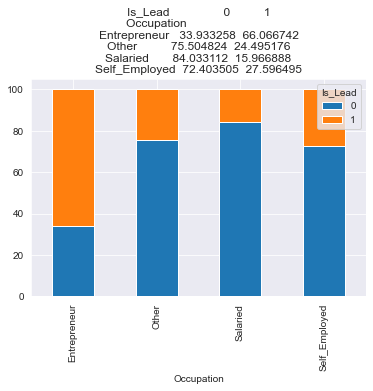

In [36]:
BVA_categorical_plot(data, 'Is_Lead', 'Occupation')

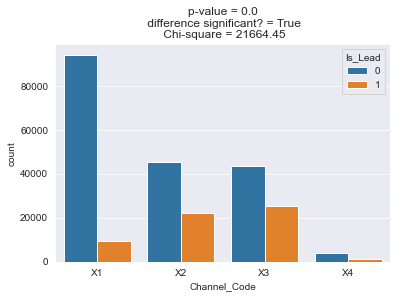

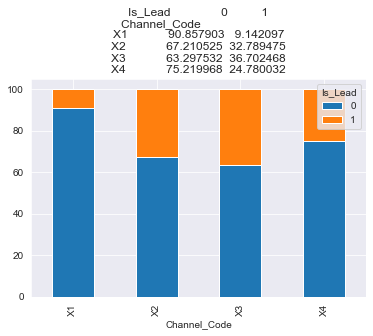

In [37]:
BVA_categorical_plot(data, 'Is_Lead', 'Channel_Code')

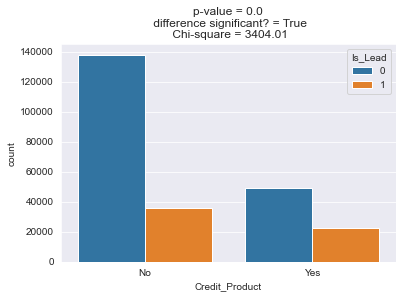

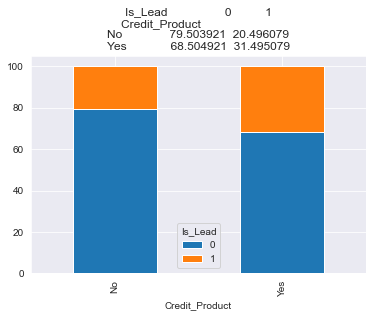

In [38]:
BVA_categorical_plot(data, 'Is_Lead', 'Credit_Product')

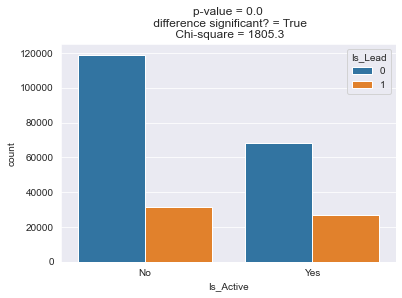

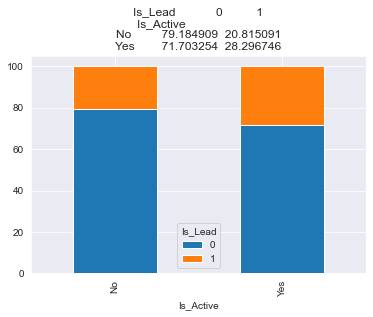

In [39]:
BVA_categorical_plot(data, 'Is_Lead', 'Is_Active')

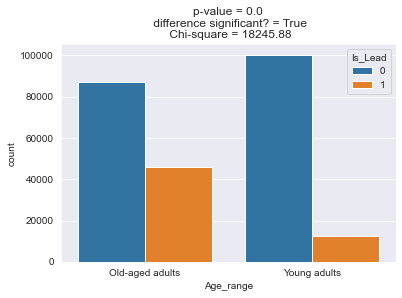

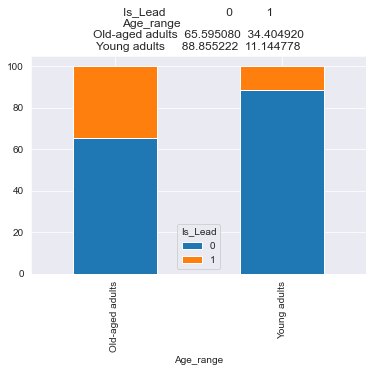

In [40]:
BVA_categorical_plot(data, 'Is_Lead', 'Age_range')

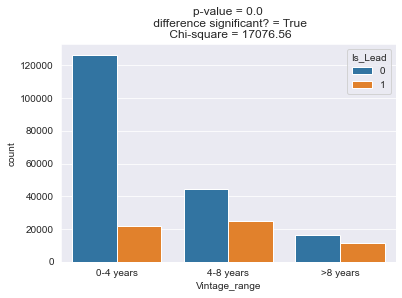

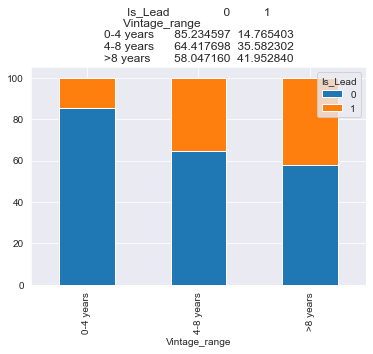

In [41]:
BVA_categorical_plot(data, 'Is_Lead', 'Vintage_range')

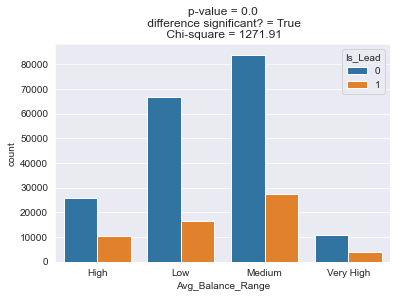

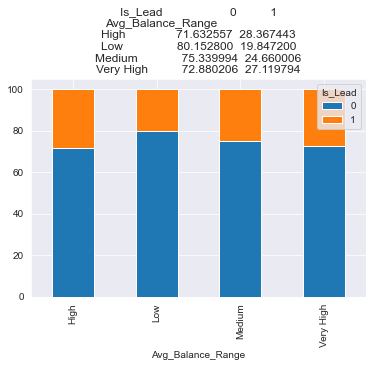

In [42]:
BVA_categorical_plot(data, 'Is_Lead', 'Avg_Balance_Range')

#### 2.3.3. CATEGORICAL - NUMERICAL


In [43]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def Bivariate_cont_cat(data, cont, cat, category):
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  t_p_val = round(TwoSampT(m1, m2, std1, std2, n1, n2),4)
  z_p_val = round(TwoSampZ(m1, m2, std1, std2, n1, n2),4)
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  table = round(table,2)
  plt.figure(figsize = (15,6), dpi=140)
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val, z_p_val, table))
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

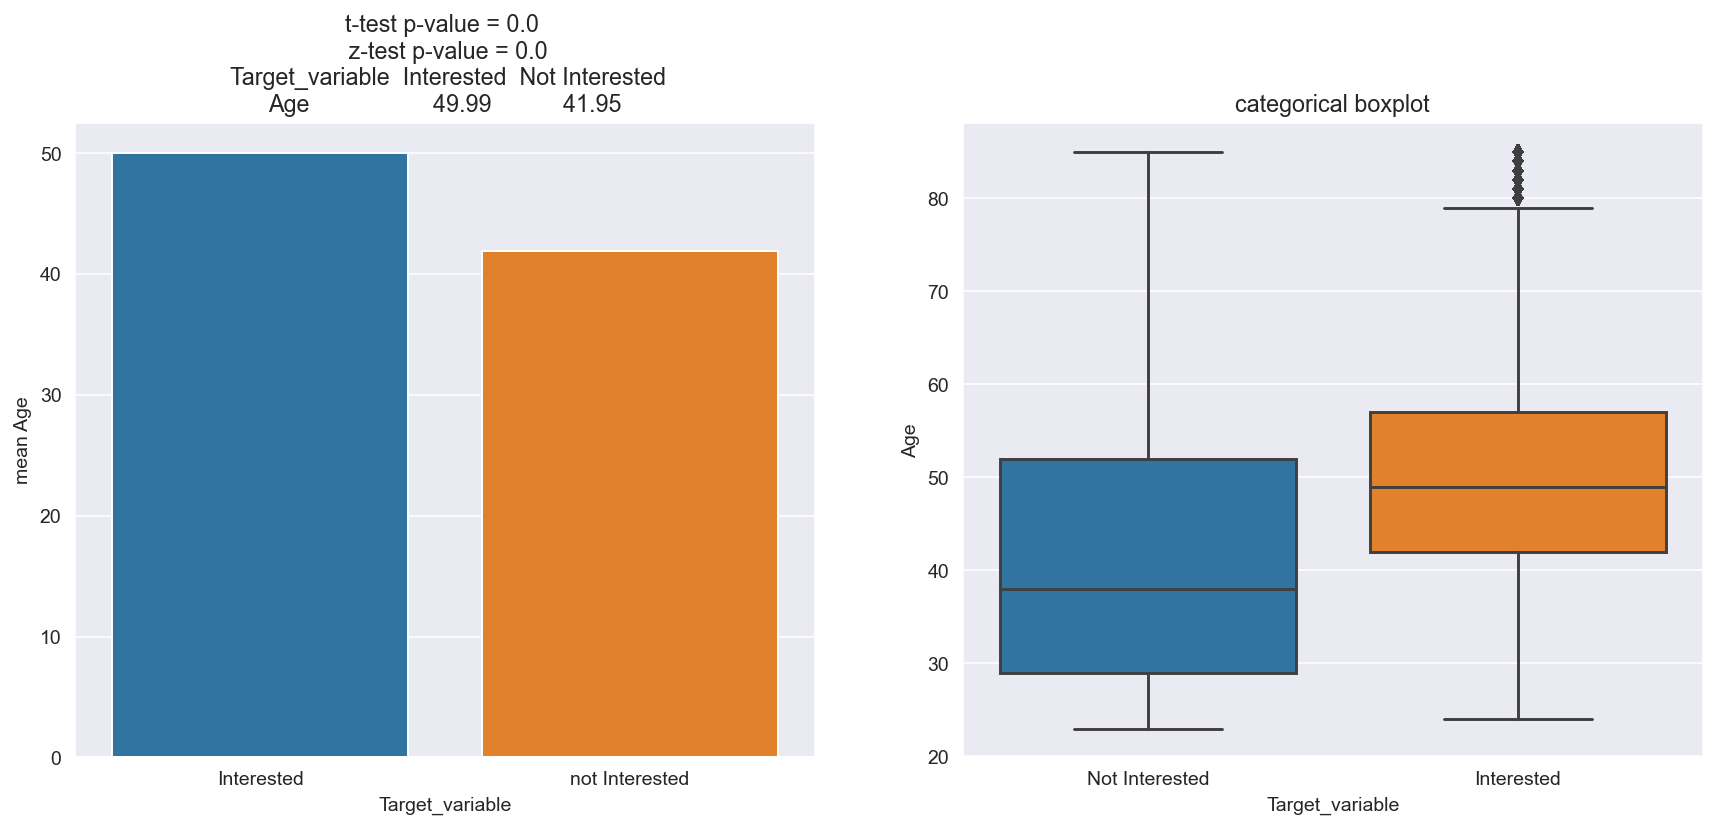

In [44]:
Bivariate_cont_cat(data, 'Age', 'Target_variable', 'Interested')

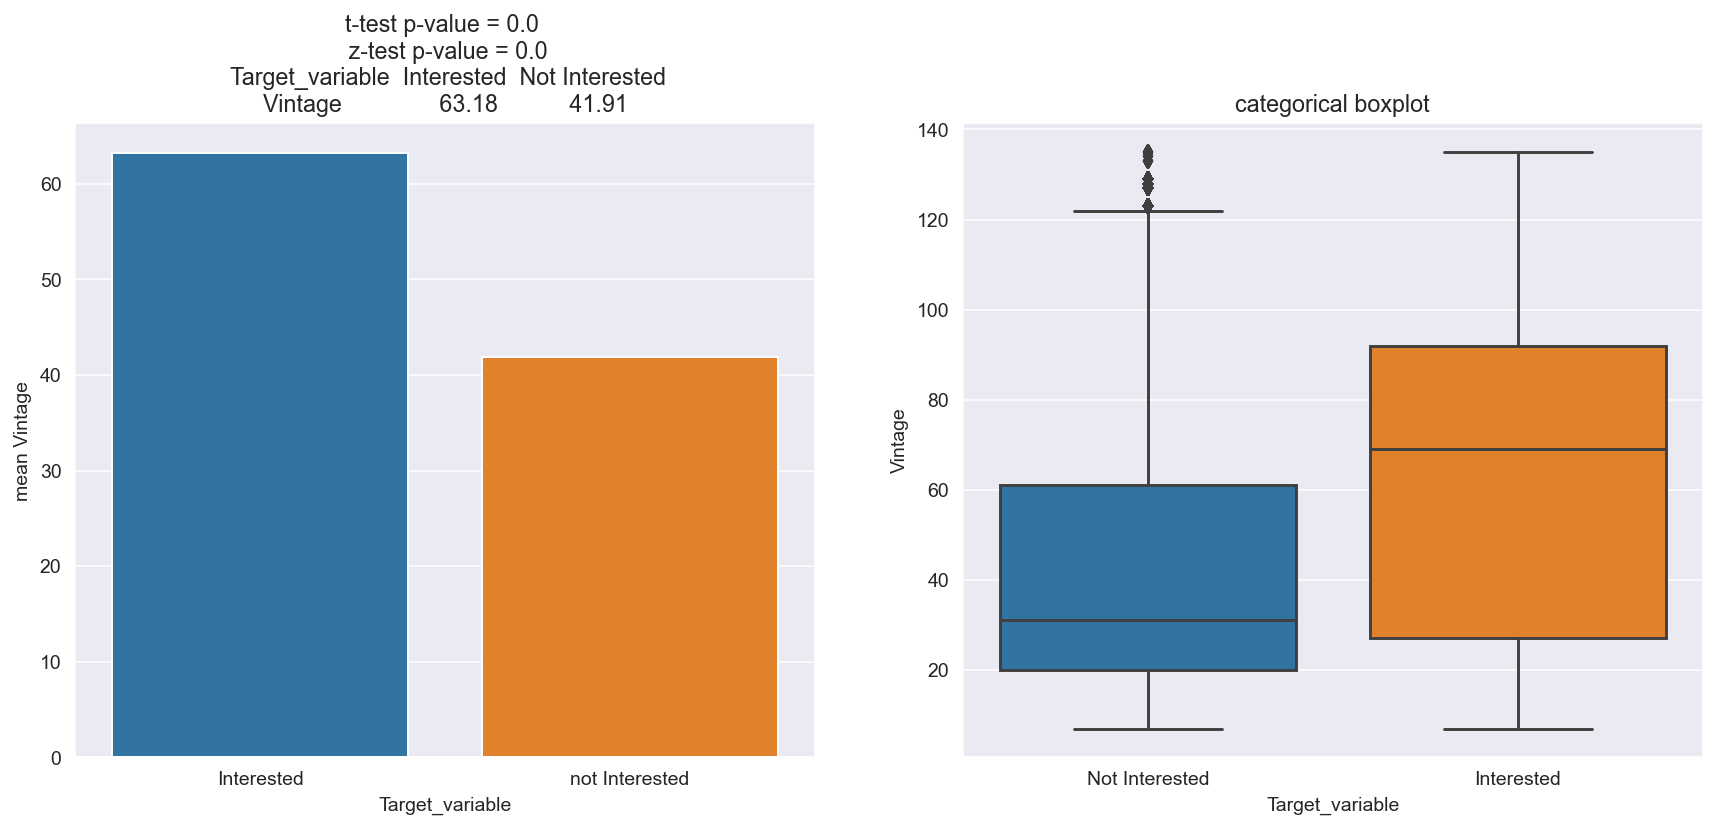

In [45]:
Bivariate_cont_cat(data, 'Vintage', 'Target_variable', 'Interested')

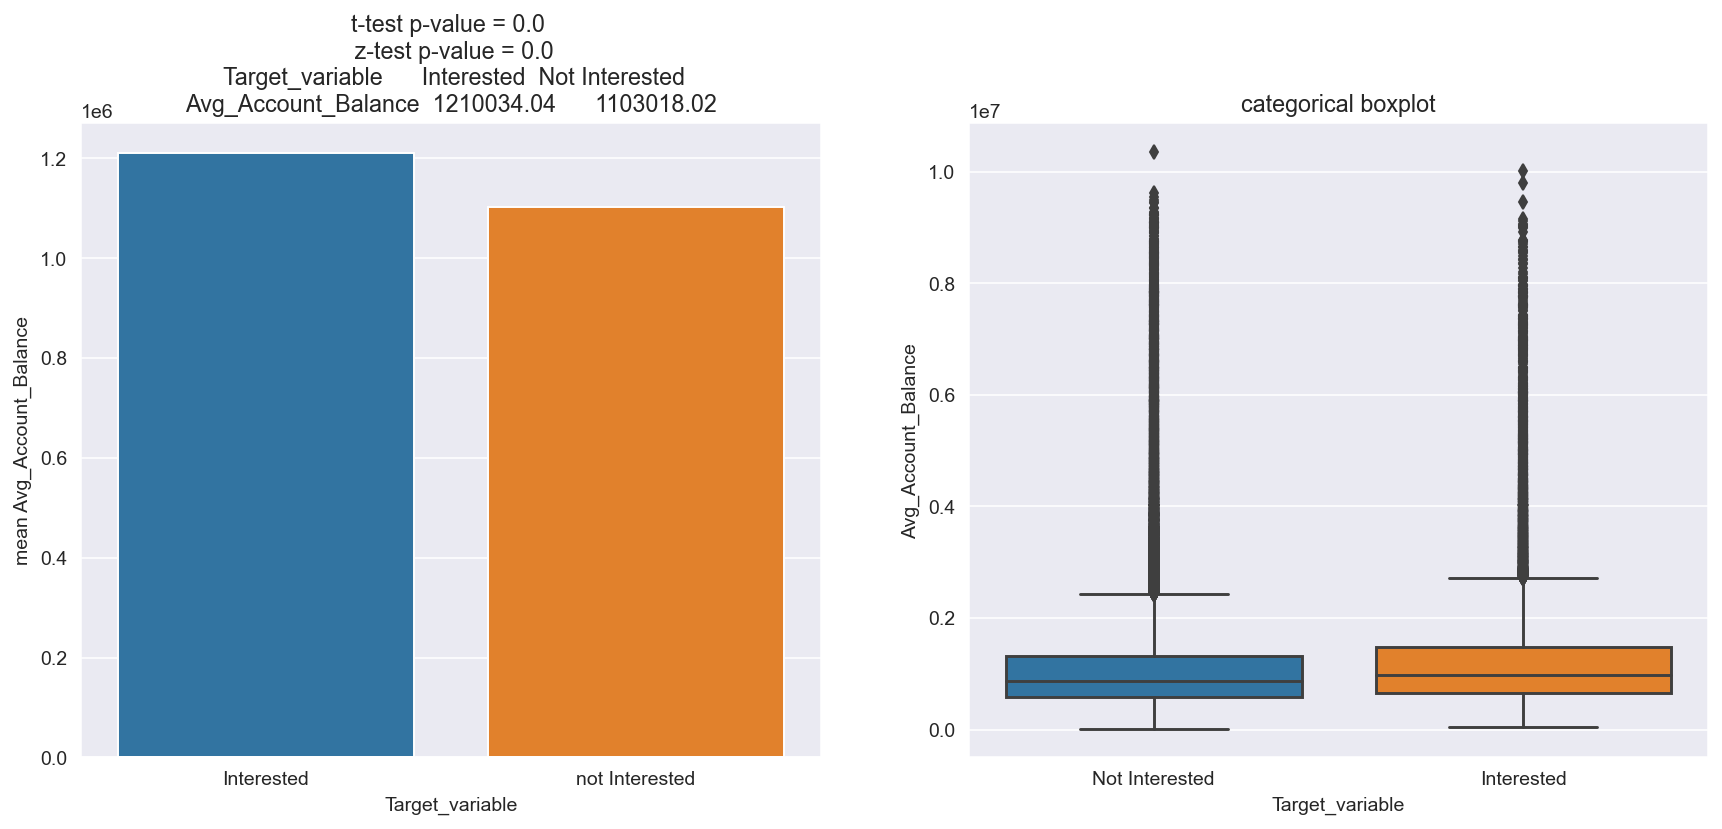

In [46]:
Bivariate_cont_cat(data, 'Avg_Account_Balance', 'Target_variable', 'Interested')

### 2.3. MULTIVARIATE ANALYSIS

We will use Pivot table to comply with the objective of identifying the factors associated with interested customers using multiple categorical features.

In [47]:
print(data['Is_Lead'].value_counts() ,'\n\n', data['Is_Lead'].value_counts())

0    187437
1     58288
Name: Is_Lead, dtype: int64 

 0    187437
1     58288
Name: Is_Lead, dtype: int64


In [48]:
data.pivot_table('Is_Lead', ['Gender', 'Age_range'], 'Avg_Balance_Range',  aggfunc='sum')

Avg_Balance_Range       High   Low  Medium  Very High
Gender Age_range                                     
Female Old-aged adults  3375  4045    7882       1298
       Young adults      705  2462    2627        311
Male   Old-aged adults  5365  7559   14143       2042
       Young adults      826  2482    2819        347

In [49]:
GAC = data.pivot_table('Is_Lead', ['Gender', 'Age_range'], 'Avg_Balance_Range', aggfunc='mean')*100
round(GAC,2)

Avg_Balance_Range        High    Low  Medium  Very High
Gender Age_range                                       
Female Old-aged adults  36.36  29.81   33.53      34.03
       Young adults     11.00   9.44   10.02      11.69
Male   Old-aged adults  37.85  32.17   35.98      35.79
       Young adults     13.02  12.27   12.60      13.55

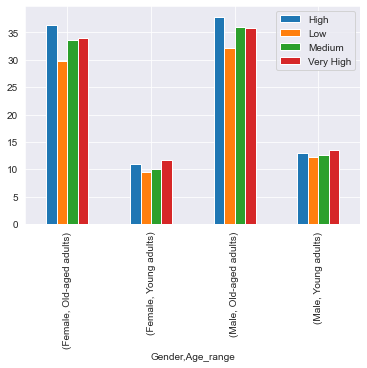

In [50]:
GAC.plot(kind = 'bar').legend()
plt.legend()

In [51]:
data.pivot_table('Is_Lead', ['Gender','Occupation' ], 'Avg_Balance_Range', aggfunc='sum')

Avg_Balance_Range     High   Low  Medium  Very High
Gender Occupation                                  
Female Entrepreneur    177    97     319         58
       Other          1278  1630    2898        534
       Salaried        719  1777    2244        343
       Self_Employed  1906  3003    5048        674
Male   Entrepreneur    260   196     555        100
       Other          2141  2605    5237        866
       Salaried       1087  1962    2913        451
       Self_Employed  2703  5278    8257        972

In [52]:
GEA = data.pivot_table('Is_Lead', ['Gender','Occupation' ], 'Avg_Balance_Range', aggfunc='mean')*100
round(GEA,2)

Avg_Balance_Range      High    Low  Medium  Very High
Gender Occupation                                    
Female Entrepreneur   65.80  64.24   67.16      63.04
       Other          25.51  16.67   21.49      24.86
       Salaried       16.88  10.76   13.25      19.26
       Self_Employed  30.98  22.75   26.83      27.47
Male   Entrepreneur   68.60  65.55   65.06      67.11
       Other          30.67  22.90   28.55      28.40
       Salaried       25.50  16.15   20.28      26.08
       Self_Employed  30.39  26.51   29.36      29.10

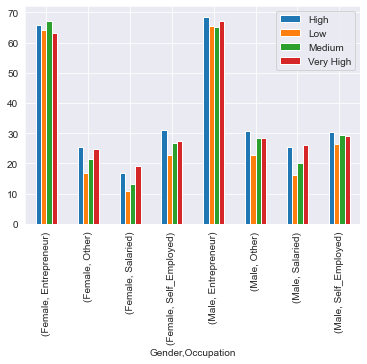

In [53]:
GEA.plot(kind = 'bar').legend()
plt.legend()

In [54]:
GECA = data.pivot_table('Is_Lead', ['Gender','Avg_Balance_Range' ], ['Occupation', 'Age_range'], aggfunc='mean')*100
round(GECA,2)

Occupation                  Entrepreneur                        Other  \
Age_range                Old-aged adults Young adults Old-aged adults   
Gender Avg_Balance_Range                                                
Female High                        67.06        47.06           31.93   
       Low                         64.44        62.50           29.68   
       Medium                      67.64        60.00           31.30   
       Very High                   61.90        75.00           30.69   
Male   High                        68.41        73.33           35.69   
       Low                         64.86        73.91           31.14   
       Medium                      65.03        65.79           34.87   
       Very High                   68.79        37.50           32.42   

Occupation                                   Salaried               \
Age_range                Young adults Old-aged adults Young adults   
Gender Avg_Balance_Range                                             
Female High                      7.16           99.40         9.81   
       Low                       5.69           99.67         9.09   
       Medium                    6.73           99.86         9.33   
       Very High                 7.29           99.41        10.86   
Male   High                      7.80           99.53        12.61   
       Low                       7.68           99.71        11.18   
       Medium                    8.65           99.29        11.64   
       Very High                 7.98           99.62        13.01   

Occupation                 Self_Employed               
Age_range                Old-aged adults Young adults  
Gender Avg_Balance_Range                               
Female High                        33.86        18.73  
       Low                         26.88        14.89  
       Medium                      30.31        16.01  
       Very High                   29.93        17.98  
Male   High                        32.79        17.99  
       Low                         29.03        18.47  
       Medium                      31.76        18.21  
       Very High                   31.17        19.35

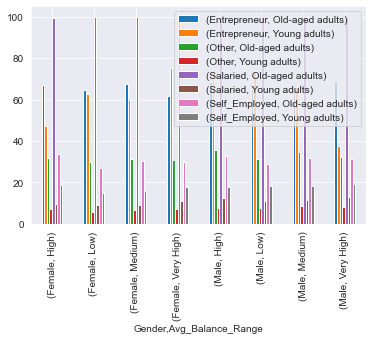

In [55]:
GECA.plot(kind = 'bar').legend()
plt.legend()